In [1]:
# ImageDataGenerator를 이용해서 Cats and Dogs binary classification
# 문제를 해결해 보아요!

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam  # 평균적으로 높은 효율을 내는 알고리즘
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# ImageDataGenerator 객체 생성
Train_Datagen =  ImageDataGenerator(rescale=1/255)
Test_Datagen =  ImageDataGenerator(rescale=1/255)

In [3]:
train_dir = './cats_and_dogs/train'
test_dir = './cats_and_dogs/test'

In [4]:
# ImageDataGenerator  설정

train_generator = Train_Datagen.flow_from_directory(
    train_dir,   # 학습용 이미지를 가져올 폴더
    classes=['cats', 'dogs'],  # cats 포더의 이미지 label을 0으로
                               #dogs 폴의 이미지는 label을 1로 설정
    target_size=(150, 150),    #이미지 resize
    batch_size=20,             #한번에 20개의 이미지만 가져와서 학습
    class_mode='binary'        #이진분류인 경우 설정
)

test_generator = Test_Datagen.flow_from_directory(
    test_dir,   # 학습용 이미지를 가져올 폴더
    classes=['cats', 'dogs'],  # cats 포더의 이미지 label을 0으로
                               #dogs 폴의 이미지는 label을 1로 설정
    target_size=(150, 150),    #이미지 resize
    batch_size=20,             #한번에 20개의 이미지만 가져와서 학습
    class_mode='binary'        #이진분류인 경우 설정
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [5]:
## 전이학습에 대해서 알아보아요!!
## 사용하는 기학습된 네트워크(Pretrained Network)는
## VGG16을 이용해 보아요!

from tensorflow.keras.applications import VGG16

model_base = VGG16(weights='imagenet',
                   include_top=False,    # classification 제외!
                   input_shape=(150,150,3))

print(model_base.summary())

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [6]:
# CNN Model 구현
model = Sequential()

model.add(model_base)

model.add(Flatten())    # 전체 데이터를 4차원에서 2차원으로 변경

model.add(Dense(256, activation= 'relu'))

# output layer
model.add(Dense(units=1,
                activation='sigmoid'))

In [7]:
print('before freeze, len of trainable_weights', len(model.trainable_weights))
model_base.trainable = True
print('after  freeze, len of trainable_weights', len(model.trainable_weights))

before freeze, len of trainable_weights 30
after  freeze, len of trainable_weights 30


In [8]:
set_trainable = False
for layer in model_base.layers:
    if layer.name == 'block5_conv1' :
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [9]:
for layer in model_base.layers[:-10]:
    layer.trainable = False

for layer in model_base.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x000002938E110EB0> False
<keras.layers.convolutional.Conv2D object at 0x000002938E1C2FD0> False
<keras.layers.convolutional.Conv2D object at 0x000002938E1E8610> False
<keras.layers.pooling.MaxPooling2D object at 0x00000293945AAA90> False
<keras.layers.convolutional.Conv2D object at 0x00000293945AA100> False
<keras.layers.convolutional.Conv2D object at 0x00000293945C0970> False
<keras.layers.pooling.MaxPooling2D object at 0x00000293945C6CA0> False
<keras.layers.convolutional.Conv2D object at 0x00000293945C6B80> False
<keras.layers.convolutional.Conv2D object at 0x00000293945D80D0> False
<keras.layers.convolutional.Conv2D object at 0x00000293945D8C40> False
<keras.layers.pooling.MaxPooling2D object at 0x00000293945E2C10> False
<keras.layers.convolutional.Conv2D object at 0x00000293945DBD30> False
<keras.layers.convolutional.Conv2D object at 0x00000293945EEBB0> False
<keras.layers.convolutional.Conv2D object at 0x00000293945F4130> False
<ker

In [10]:
# print(model.summary())
# model이 어떻게 동작하는지를 지정
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [11]:
print(model_base.summary())

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [12]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 9,177,089
Non-trainable params: 7,635,264
_________________________________________________________________
None


In [13]:
# 설정이 다 되었으면 모델을 학습.
history = model.fit(train_generator,
          steps_per_epoch=100,
          epochs=30,
          verbose=1,
          validation_data=test_generator,
          validation_steps=50)

Epoch 1/30
100/100 [==============================] - 24s 182ms/step - loss: 0.3269 - accuracy: 0.8515 - val_loss: 0.2223 - val_accuracy: 0.8980
Epoch 2/30
100/100 [==============================] - 18s 181ms/step - loss: 0.1140 - accuracy: 0.9505 - val_loss: 0.2209 - val_accuracy: 0.9120
Epoch 3/30
100/100 [==============================] - 18s 182ms/step - loss: 0.0404 - accuracy: 0.9855 - val_loss: 0.2117 - val_accuracy: 0.9220
Epoch 4/30
100/100 [==============================] - 18s 182ms/step - loss: 0.0241 - accuracy: 0.9915 - val_loss: 0.4642 - val_accuracy: 0.8650
Epoch 5/30
100/100 [==============================] - 18s 183ms/step - loss: 0.0096 - accuracy: 0.9970 - val_loss: 0.4025 - val_accuracy: 0.9000
Epoch 6/30
100/100 [==============================] - 18s 183ms/step - loss: 0.0139 - accuracy: 0.9945 - val_loss: 0.4027 - val_accuracy: 0.9030
Epoch 7/30
100/100 [==============================] - 18s 183ms/step - loss: 0.0192 - accuracy: 0.9920 - val_loss: 0.3248 - val_ac

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 9,177,089
Non-trainable params: 7,635,264
_________________________________________________________________


In [15]:
import matplotlib.pylab as plt

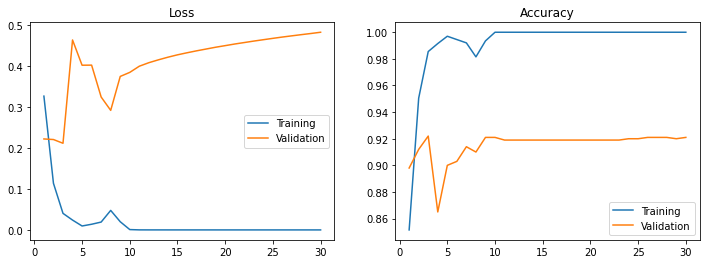

In [16]:
def plot_loss_acc(history, epoch):

    loss, val_loss = history.history['loss'], history.history['val_loss']
    acc, val_acc = history.history['accuracy'], history.history['val_accuracy']

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    axes[0].plot(range(1, epoch + 1), loss, label='Training')
    axes[0].plot(range(1, epoch + 1), val_loss, label='Validation')
    axes[0].legend(loc='best')
    axes[0].set_title('Loss')

    axes[1].plot(range(1, epoch + 1), acc, label='Training')
    axes[1].plot(range(1, epoch + 1), val_acc, label='Validation')
    axes[1].legend(loc='best')
    axes[1].set_title('Accuracy')

    plt.show()

plot_loss_acc(history, 30)